                     Consumption
Timestamp                       
2022-01-01 00:00:00           45
2022-01-01 01:00:00           48
2022-01-01 02:00:00           65
2022-01-01 03:00:00           68
2022-01-01 04:00:00           68
...                          ...
2022-01-31 20:00:00           30
2022-01-31 21:00:00            4
2022-01-31 22:00:00           75
2022-01-31 23:00:00           85
2022-02-01 00:00:00           66

[745 rows x 1 columns]

Original Time Series Data:


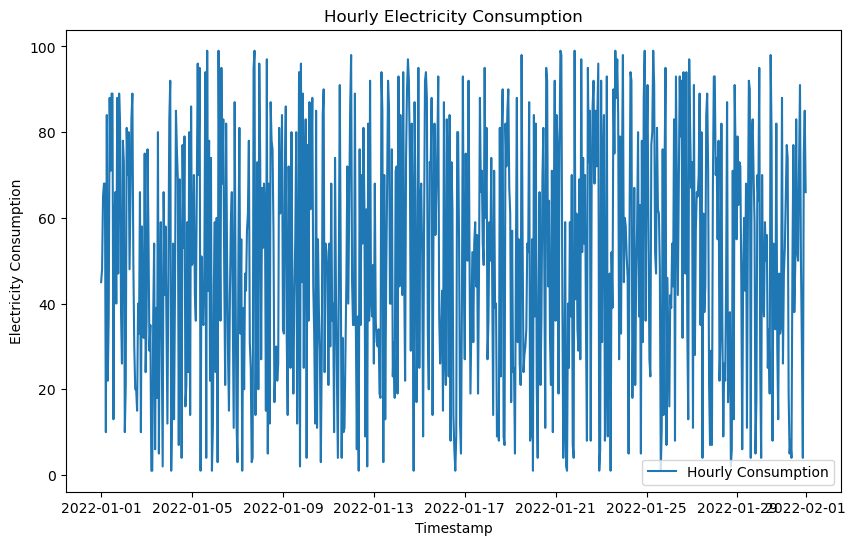


Original Time Series Data and Daily Total Consumption:


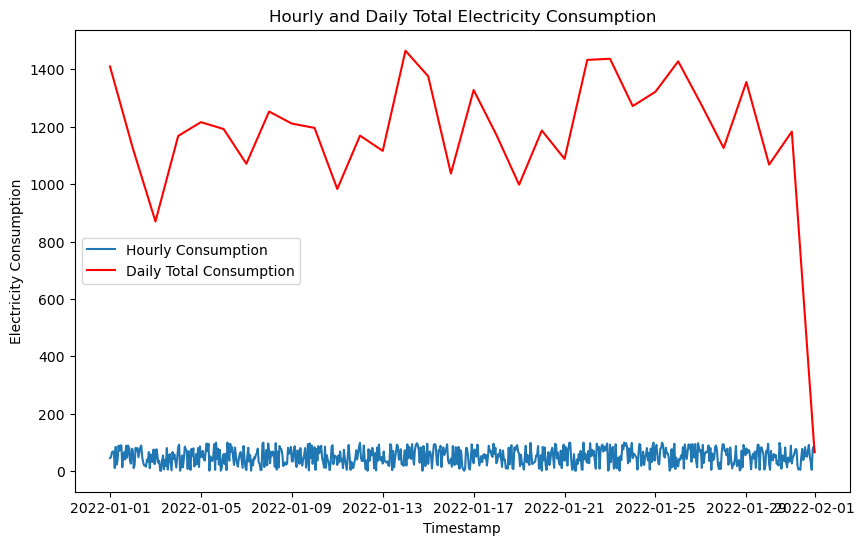

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a date range for a month, hourly
date_range = pd.date_range(start='1/1/2022', end='2/1/2022', freq='H')

# Generate random electricity consumption data
np.random.seed(0)  # for reproducibility
consumption = np.random.randint(1, 100, size=len(date_range))

# Create a DataFrame
df = pd.DataFrame(data={'Timestamp': date_range, 'Consumption': consumption})

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the index of the DataFrame
df.set_index('Timestamp', inplace=True)

print(df)

# Plot the original time series
print("\nOriginal Time Series Data:")
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Consumption'], label='Hourly Consumption')
plt.title('Hourly Electricity Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

# Group the data by day and calculate the daily total electricity consumption
daily_consumption = df.resample('D').sum()

# Plot the original time series along with the daily total electricity consumption
print("\nOriginal Time Series Data and Daily Total Consumption:")
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Consumption'], label='Hourly Consumption')
plt.plot(daily_consumption.index,
         daily_consumption['Consumption'], label='Daily Total Consumption', color='red')
plt.title('Hourly and Daily Total Electricity Consumption')
plt.xlabel('Timestamp')
plt.ylabel('Electricity Consumption')
plt.legend()
plt.show()

            Sales
Date             
2012-03-31     45
2012-06-30     48
2012-09-30     65
2012-12-31     68
2013-03-31     68


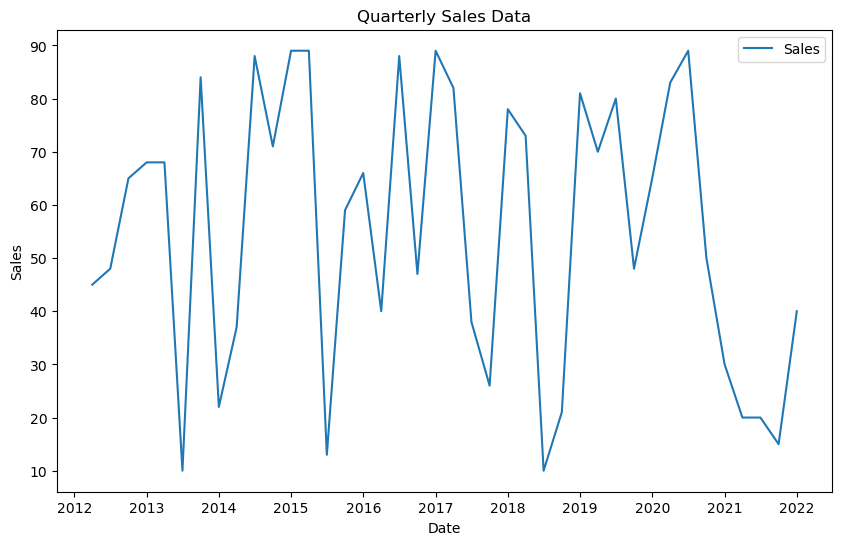

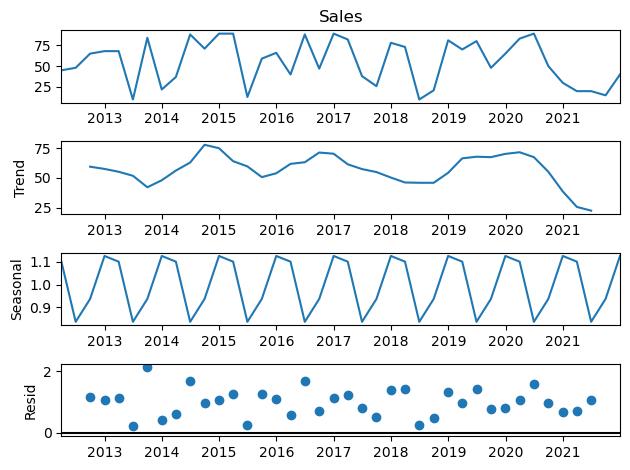

Trend:
 Date
2012-03-31       NaN
2012-06-30       NaN
2012-09-30    59.375
2012-12-31    57.500
2013-03-31    55.125
2013-06-30    51.750
2013-09-30    42.125
2013-12-31    48.000
2014-03-31    56.125
2014-06-30    62.875
2014-09-30    77.750
2014-12-31    74.875
2015-03-31    64.000
2015-06-30    59.625
2015-09-30    50.625
2015-12-31    53.875
2016-03-31    61.750
2016-06-30    63.125
2016-09-30    71.250
2016-12-31    70.250
2017-03-31    61.375
2017-06-30    57.375
2017-09-30    54.875
2017-12-31    50.250
2018-03-31    46.125
2018-06-30    45.875
2018-09-30    45.875
2018-12-31    54.250
2019-03-31    66.375
2019-06-30    67.750
2019-09-30    67.375
2019-12-31    70.125
2020-03-31    71.500
2020-06-30    67.375
2020-09-30    55.125
2020-12-31    38.625
2021-03-31    25.625
2021-06-30    22.500
2021-09-30       NaN
2021-12-31       NaN
Name: trend, dtype: float64
Seasonal:
 Date
2012-03-31    1.101007
2012-06-30    0.835988
2012-09-30    0.936877
2012-12-31    1.126128
2013-03-31 

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Create a date range for a decade, quarterly
date_range = pd.date_range(start='1/1/2012', end='1/1/2022', freq='Q')

# Generate random sales data
np.random.seed(0)  # for reproducibility
sales = np.random.randint(1, 100, size=len(date_range))

# Create a DataFrame
df = pd.DataFrame(data={'Date': date_range, 'Sales': sales})

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index of the DataFrame
df.set_index('Date', inplace=True)

print(df.head())

import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Plot the time series to visualize the overall pattern in the sales data
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Sales'], label='Sales')
plt.title('Quarterly Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Apply seasonal decomposition to identify and separate the trend, seasonal, and residual components
result = seasonal_decompose(df['Sales'], model='multiplicative')

# Plot the original data, the trend, the seasonality, and the residuals 
result.plot()
plt.show()

# Interpret the identified trend, seasonal pattern, and any observed cyclical behavior
print("Trend:\n", result.trend)
print("Seasonal:\n", result.seasonal)
print("Residual:\n", result.resid)

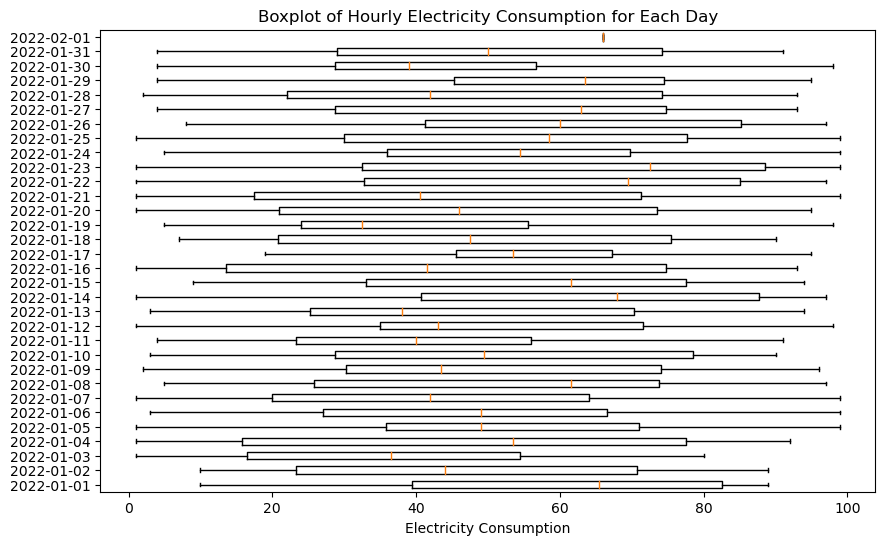

In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a date range for a month, hourly
date_range = pd.date_range(start='1/1/2022', end='2/1/2022', freq='H')

# Generate random electricity consumption data
np.random.seed(0)  # for reproducibility
consumption = np.random.randint(1, 100, size=len(date_range))

# Create a DataFrame
df = pd.DataFrame(data={'Timestamp': date_range, 'Consumption': consumption})

# Convert the 'Timestamp' column to datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Set the 'Timestamp' column as the index of the DataFrame
df.set_index('Timestamp', inplace=True)

# Group the data by day
daily_groups = df.groupby(df.index.date)

# Create a boxplot for each day
plt.figure(figsize=(10, 6))
plt.boxplot([group['Consumption'] for name, group in daily_groups], vert=False)
plt.title('Boxplot of Hourly Electricity Consumption for Each Day')
plt.xlabel('Electricity Consumption')
plt.yticks(range(1, len(daily_groups) + 1), [name for name, group in daily_groups])
plt.show()